## Erstes Programmierbeispiel - Flugbahnberechnung

In einem ersten Beispiel soll die Flugbahn eines Objekts berechnet werden. Wir wollen dazu Gebrauch von der Numpy-Bibliothek machen und die Matplotlib-Bibliothek zur Visualisierung nutzen.

Als erstes importieren wir deshalb die notwendigen Bibliotheken und nehmen ein paar Einstellungen vor, damit die Grafiken schöner aussehen:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Im zweiten Schritt initialisieren wir die benötigten Variablen:

In [3]:
# Erdbeschleunigung in m/s^2
g = 9.81

# Masse des Objekts in kg
m = 1.5

# Startposition des Objekts
initial_pos = np.array([0.0, 0.0])
# Startposition in Liste speichern
positions = [initial_pos]

# Startgeschwindigkeit des Objekts in m/s
initial_vel = np.array([20.0, 2.0])
# Startgeschwindigkeit in Liste speichern
velocities = [initial_vel]

# Zeitschrittweite festlegen
deltat = 0.01

und definieren eine Funktion, welche die Kraft auf das Objekt berechnet (hier ganz einfach die Erdanziehungskraft, die nur in $y$-Richtung wirkt): 

In [4]:
def calc_force(m, v):
    return np.array([0, -m*g])

Damit können wir nun in einer `while`-Schleife zeitschrittweise die neue Position ausrechnen:

In [5]:
# solange die letzte Position noch oberhalb der Nulllinie ist:
while positions[-1][1] >= 0:
    print (positions[-1], velocities[-1])
    new_pos = positions[-1] + velocities[-1] * deltat
    new_vel = velocities[-1] + calc_force(m, velocities[-1]) / m * deltat
    positions.append(new_pos.copy())
    velocities.append(new_vel.copy())

[ 0.  0.] [ 20.   2.]
[ 0.2   0.02] [ 20.       1.9019]
[ 0.4       0.039019] [ 20.       1.8038]
[ 0.6       0.057057] [ 20.       1.7057]
[ 0.8       0.074114] [ 20.       1.6076]
[ 1.       0.09019] [ 20.       1.5095]
[ 1.2       0.105285] [ 20.       1.4114]
[ 1.4       0.119399] [ 20.       1.3133]
[ 1.6       0.132532] [ 20.       1.2152]
[ 1.8       0.144684] [ 20.       1.1171]
[ 2.        0.155855] [ 20.      1.019]
[ 2.2       0.166045] [ 20.       0.9209]
[ 2.4       0.175254] [ 20.       0.8228]
[ 2.6       0.183482] [ 20.       0.7247]
[ 2.8       0.190729] [ 20.       0.6266]
[ 3.        0.196995] [ 20.       0.5285]
[ 3.2      0.20228] [ 20.       0.4304]
[ 3.4       0.206584] [ 20.       0.3323]
[ 3.6       0.209907] [ 20.       0.2342]
[ 3.8       0.212249] [ 20.       0.1361]
[ 4.       0.21361] [ 20.      0.038]
[ 4.2      0.21399] [ 20.      -0.0601]
[ 4.4       0.213389] [ 20.      -0.1582]
[ 4.6       0.211807] [ 20.      -0.2563]
[ 4.8       0.209244] [ 20.     

Als letztes stellen wir noch die Flugbahn des Objekts dar:

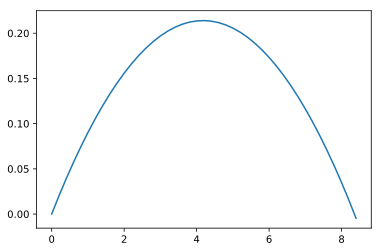

In [7]:
pos_array = np.array(positions)
plt.plot(pos_array[:,0], pos_array[:,1], '-');

### Aufgaben

1. Erweitern Sie das Programm, so dass auch der Luftwiderstand des Objekts berücksichtigt wird.

2. Erweitern Sie das Diagramm um Achsenbeschriftungen

3. Stellen Sie die Geschwindigkeit des Objekts über der Zeit in einem Diagramm dar.

Danach geht es [hier](TFD - 2.1 Molekulardynamik - Einführung.ipynb) mit einer Molekulardynamik-Simulation weiter.


---
###### Copyright (c) 2017, Matthias Stripf

Der folgende Python-Code darf ignoriert werden. Er dient nur dazu, die richtige Formatvorlage für die Jupyter-Notebooks zu laden.

In [18]:
from IPython.core.display import HTML
def css_styling():
    styles = open('TFDStyle.css', 'r').read()
    return HTML(styles)
css_styling()